## 1


## A
let $f(x)=A\frac{1}{(1+x)^n}$
Then, normalising,$f(x)$:
$$\int_{0}^{\infty}dxf(x)=A \frac{(1+x)^{1-n}}{1-n}\biggl|_{0}^{\infty}=1$$
At infinity, the first term converges to zero, then,
$$A=n-1$$

# B

We know, $U(0,1)$ is $1$ in $[0,1]$.
Then, $$\int_{0}^{x(r)}f(x)dx=\int_{0}^{r}U(r)dr$$ 
Since, $r < 1$,$U(r)=1$,
$$\int_{0}^{x(r)}dxf(x)=(n-1) \frac{(1+x)^{1-n}}{1-n}\biggl|_{0}^{x(r)}=(n-1)\frac{(1+x(r))^{1-n}-1}{1-n}=r$$
then, using $\frac{n-1}{1-n}=-1$,
$$x(r)=(1-r)^{\frac{1}{1-n}}-1$$


## C

In [1]:
import numpy as np
from pylab import plot,grid,xlabel,ylabel,legend
from random import random,seed
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

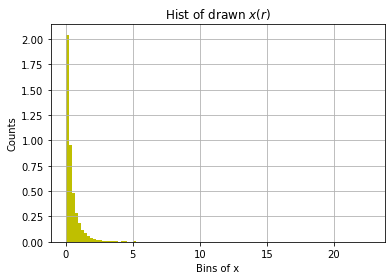

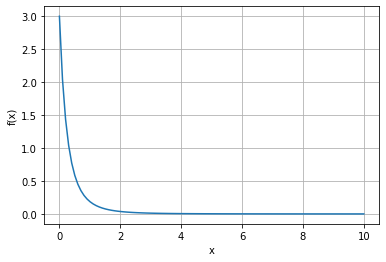

In [2]:
seed=0.1
N=10000
n=4
p=[]
seed=0.001
for i in range(N):
    r=random()
    x=(((1-r)**(1/(1-n))))-1
    p.append(x)

x = p


n, bins, patches = plt.hist(x, 100, density=True, facecolor='y', )


plt.xlabel('Bins of x')
plt.ylabel('Counts')
plt.title('Hist of drawn $x(r)$')

plt.grid(True)
plt.show()

x=np.linspace(0,10,num=100)
y=((3)/(1+x)**4)
plot(x,y)
xlabel('x')
ylabel('f(x)')
grid()

Yes the curve matches the histogram.

## 2

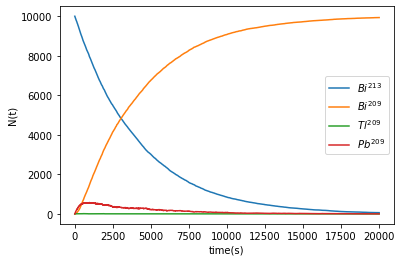

In [3]:
dt=1.0
NBi=10000
NPb=0
NTl=0
NBi2=0
tau=46*60
tau2=2.2*60
tau3=3.3*60
p1=(1-2**(-dt/tau))#Straight route to Pb
p2=(1-2**(-dt/tau2))
p3=(1-2**(-dt/tau3))
tmax=20000

t1=np.arange(0.0,tmax,dt)
Pb=[]
Bi2=[]
Tl=[]
Bi=[]
for t in t1:
    Pb.append(NPb)
    Bi.append(NBi)
    Tl.append(NTl)
    Bi2.append(NBi2)
    
    decay=0
    for i in range(NPb):
        if random()<p3:
            decay+=1
    NPb-=decay
    NBi2+=decay
    decay2=0
    for i in range(NTl):
        if random()<p2:
            decay2+=1
    NPb+=decay2
    NTl-=decay2
    decay3=0
    for i in range(NBi):
        if random()<p1:
            decay3+=1
            
    NBi-=decay3
    if random()<0.9791:
        NPb+=decay3
    else:
        NTl+=decay3
               
plot(t1,Bi,label='$Bi^{213}$')
plot(t1,Bi2,label='$Bi^{209}$')
plot(t1,Tl,label='$Tl^{209}$')
plot(t1,Pb,label='$Pb^{209}$')
xlabel("time(s)")
ylabel("N(t)")
legend()

## 3

A) $$I\sim \frac{V}{N} \sum_{i=1}^{N} f(\textbf{r}_{i})$$

for 10 dimensions $V \sim 2^{10}$

In [4]:
from random import uniform 

In [5]:
def V(N):
    n=10
    V=2**n
    int1=0.0
    for i in range(N):
        z=[]
        for j in range(n):
            r=uniform(-1, 1)
            z.append(r)
        y=0.0
        for k in z:
            y=y+(k*k)
        if y<=1:
            int1+=1
        
    return((V/N)*int1)      
                
                
                
                
                
                
        
   

In [6]:
def residue(N):
    return(abs(((np.pi**5)/120)-V(N)))
    

In [10]:
Y1=[]#this is very slow for higher powers than 6
for i in np.logspace(2,6,5):
    print(i)
    
    Y1.append(np.log10(residue(i)))

    

100.0
1000.0
10000.0
100000.0
1000000.0


In [13]:
Y2=[]
for i in np.logspace(2,6,5):
    Y2.append(residue(int(i)))

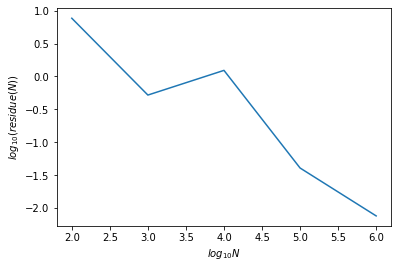

In [18]:

U=[2,3,4,5,6]
Y=Y1
E=Y2
ylabel("$log_{10}(residue(N))$")
xlabel("$log_{10}N$")

plot(U,Y)
